In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scipy.stats import stats
from utils.gray2ndvi import gray2ndvi, threshold
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
MIN_NDVI = 0.178432
MAX_NDVI = 0.368569

In [3]:
df_07_13 = pd.read_csv("../data/Spreadsheet/2017-07-13.csv")
df_08_03 = pd.read_csv("../data/Spreadsheet/2017-08-03.csv")

In [4]:
ndvi = df_07_13["NDVI"].as_matrix()
spad = df_07_13["SPAD"].as_matrix()
ndvi = np.concatenate((ndvi, df_08_03["NDVI"].as_matrix()))
spad = np.concatenate((spad, df_08_03["SPAD"].as_matrix()))

In [5]:
rows, cols = 8, 3
path = "../data/UAV/orange_segmented"

# 160x160 is the image dimension
endvi = np.zeros((rows, cols, 160, 160))

for i in range(rows):
    for j in range(cols):
        filename = path + "/{}{}.png".format(j+20, chr(i+65))
        try:
            img = cv2.imread(filename)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray_img = cv2.resize(gray_img, (160, 160))
            endvi[i, j] = gray2ndvi(gray_img, MIN_NDVI, MAX_NDVI)
            endvi[i, j] = threshold(endvi[i, j], MIN_NDVI, MAX_NDVI)
        except:
            endvi[i, j] = np.nan

In [6]:
endvi_mean = np.zeros((rows, cols))

for i in range(rows):
    for j in range(cols):
        endvi_mean[i, j] = np.nanmean(endvi[i, j])

/home/dat/.Envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [7]:
endvi_mean[0, 0]

0.32359733124398826

In [8]:
endvi_mean = endvi_mean.flatten("F")
endvi_mean = endvi_mean[~np.isnan(endvi_mean)]
endvi_mean

array([ 0.32359733,  0.32038739,  0.30868971,  0.31494071,  0.30942974,
        0.31628345,  0.33679959,  0.33353946,  0.32398808,  0.32013058,
        0.3128491 ,  0.30750925])

In [9]:
spad_mean = np.mean(df_07_13["SPAD"].reshape(-1, 2), axis=1)
spad_mean

/home/dat/.Envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([ 31.075,  42.455,  56.88 ,  41.57 ,  32.81 ,  42.58 ,  42.465])

In [10]:
spad_mean = np.concatenate((spad_mean, np.mean(df_08_03["SPAD"].reshape(-1, 2), axis=1)[3:]))

/home/dat/.Envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [11]:
spad_mean

array([ 31.075,  42.455,  56.88 ,  41.57 ,  32.81 ,  42.58 ,  42.465,
        48.855,  43.875,  45.69 ,  50.19 ,  42.21 ])

In [12]:
stats.pearsonr(endvi_mean, spad_mean)

(-0.064499393052582968, 0.84214818793706292)

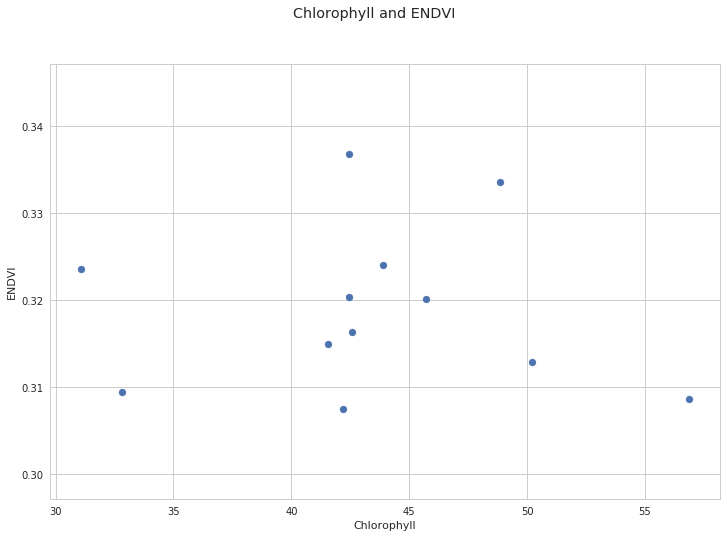

In [13]:
fig = plt.figure()
plt.scatter(spad_mean, endvi_mean)
fig.suptitle("Chlorophyll and ENDVI")
plt.ylabel("ENDVI")
plt.xlabel("Chlorophyll")